In [1]:
# !/usr/bin/env python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import datetime
import io
import re
import itertools
import collections
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# 前処理済みテーブル
df_p = pd.read_csv("out/duplicate_excluded_df_2021-11-09_promoV8NET-logdata_1sec.csv", encoding="cp932")
#df_p = pd.read_csv("out/duplicate_excluded_df_Engineer_V8LOG.csv", encoding="cp932")
# df_p = pd.read_csv("out/duplicate_excluded_df_Taiyoubuhinten_v8LOG.csv", encoding="cp932")
df_p.head()

,月日,時刻,子ユーザ,入力値,コマンド,受信サイズ,受信数,返却数,parKurumaNo,ParamList,...,KurumaInfo,parJunsei,parType,parHMCount,parHinmokuNos,parMakerNo,parMakerNos,parSyadaiNo,CallHinban,date
0,2021-11-09,15:02:12,221002,NaN,部品検索（HTTP）,329,7,6,143096.0,"['', '']",...,"['', '']",NaN,NaN,23.0,"['1020', '1020', '1020', '1021', '1021', '1021...",NaN,"['3200', '2260', '4060', '3200', '2260', '4060...",0.0,NaN,2021-11-09 15:02:12
1,2021-11-09,15:02:13,221002,NaN,部品検索（HTTP）,329,7,6,145336.0,"['', '']",...,"['', '']",NaN,NaN,23.0,"['1020', '1020', '1020', '1021', '1021', '1021...",NaN,"['3200', '2260', '4060', '3200', '2260', '4060...",0.0,NaN,2021-11-09 15:02:13
2,2021-11-09,15:02:14,221002,NaN,部品検索（HTTP）,329,7,6,147465.0,"['', '']",...,"['', '']",NaN,NaN,23.0,"['1020', '1020', '1020', '1021', '1021', '1021...",NaN,"['3200', '2260', '4060', '3200', '2260', '4060...",0.0,NaN,2021-11-09 15:02:14
3,2021-11-09,15:02:15,221002,NaN,部品検索（HTTP）,329,7,6,150488.0,"['', '']",...,"['', '']",NaN,NaN,23.0,"['1020', '1020', '1020', '1021', '1021', '1021...",NaN,"['3200', '2260', '4060', '3200', '2260', '4060...",0.0,NaN,2021-11-09 15:02:15
4,2021-11-09,15:02:16,221002,122905R0004,価格検索（HTTP）,77,5,1,NaN,"['', '']",...,"['', '']",0.0,NaN,NaN,"['', '']",0.0,"['', '']",NaN,NaN,2021-11-09 15:02:16


array([[<AxesSubplot:title={'center':'受信サイズ'}>,
        <AxesSubplot:title={'center':'受信数'}>,
        <AxesSubplot:title={'center':'返却数'}>],
       [<AxesSubplot:title={'center':'parKurumaNo'}>,
        <AxesSubplot:title={'center':'parJunsei'}>,
        <AxesSubplot:title={'center':'parHMCount'}>],
       [<AxesSubplot:title={'center':'parMakerNo'}>,
        <AxesSubplot:title={'center':'parSyadaiNo'}>, <AxesSubplot:>]],
      dtype=object)

C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current

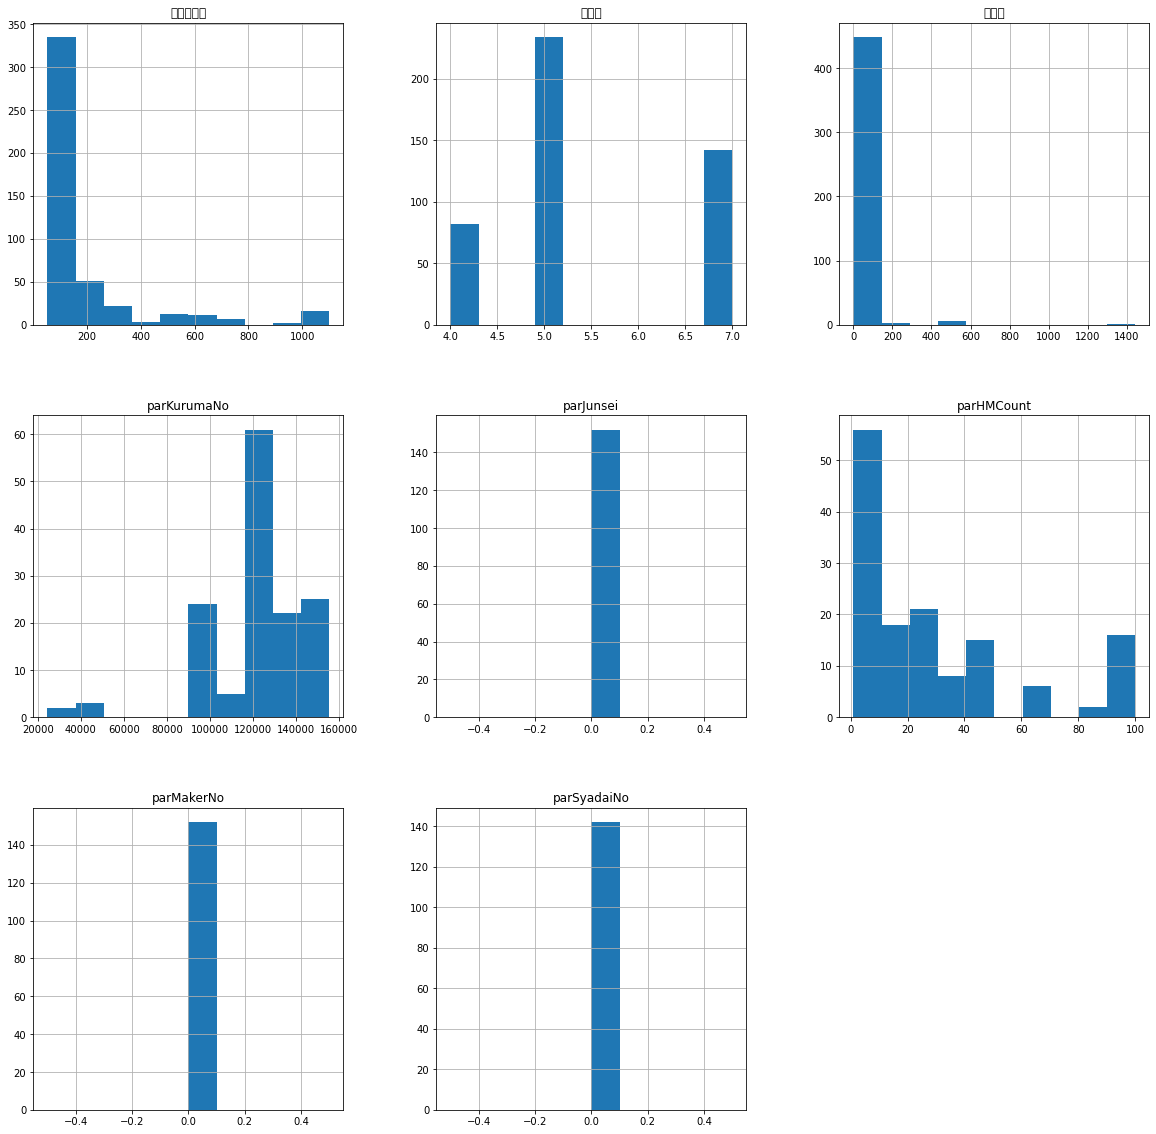

In [4]:
rcParams['figure.figsize'] = 20, 20
df_p.hist()

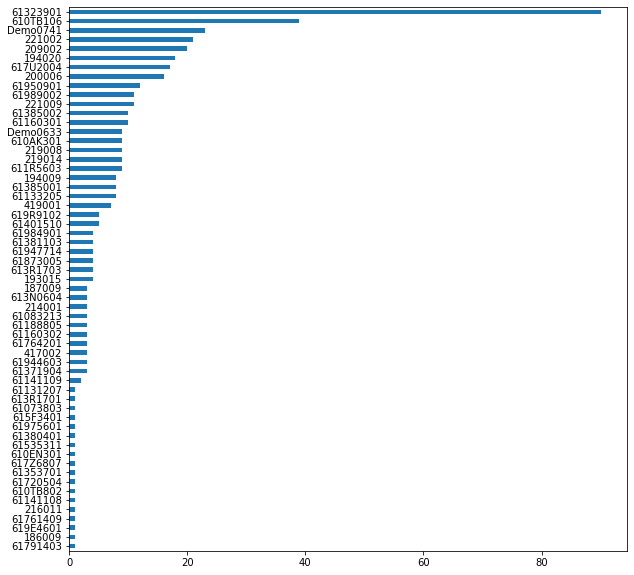

In [5]:
# 子ユーザ
df_p_child_user = df_p['子ユーザ'].value_counts(sort=True)
rcParams['figure.figsize'] = 10, 10
ax = df_p_child_user.iloc[:].plot(kind="barh")
ax.invert_yaxis()

C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current

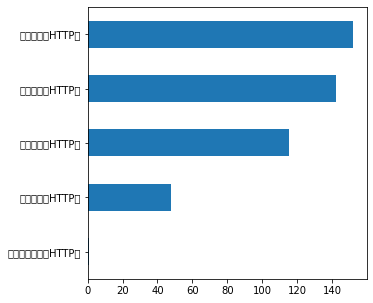

In [6]:
# コマンド
df_p_commands = df_p['コマンド'].value_counts(sort=True)
rcParams['figure.figsize'] = 5, 5
ax =df_p_commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

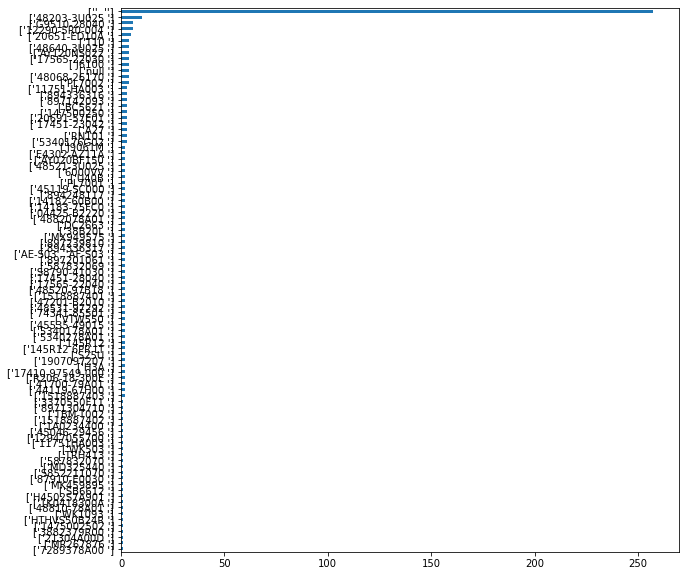

In [7]:
# ParHinban
commands = df_p["parHinban"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

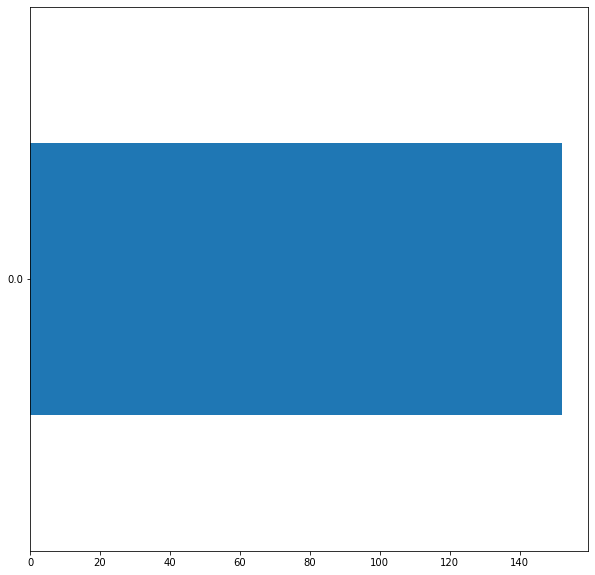

In [8]:
# parJunsei
commands = df_p["parJunsei"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

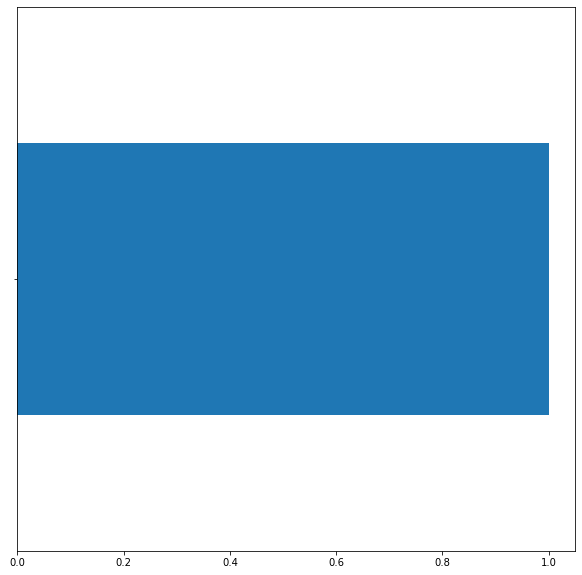

In [9]:
commands = df_p["parType"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

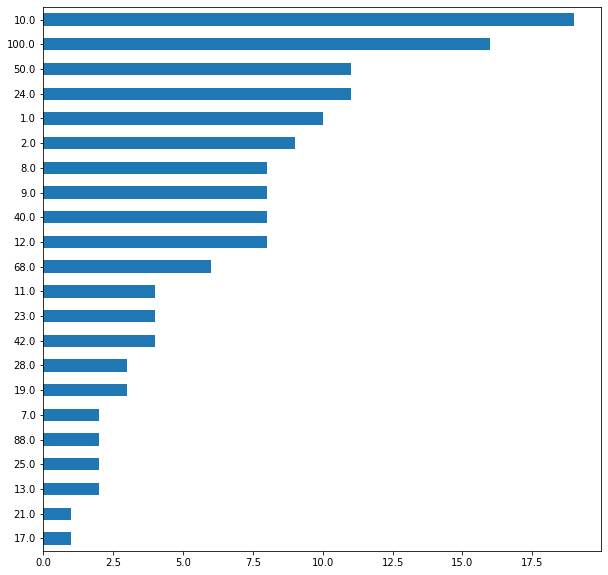

In [10]:
commands = df_p["parHMCount"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

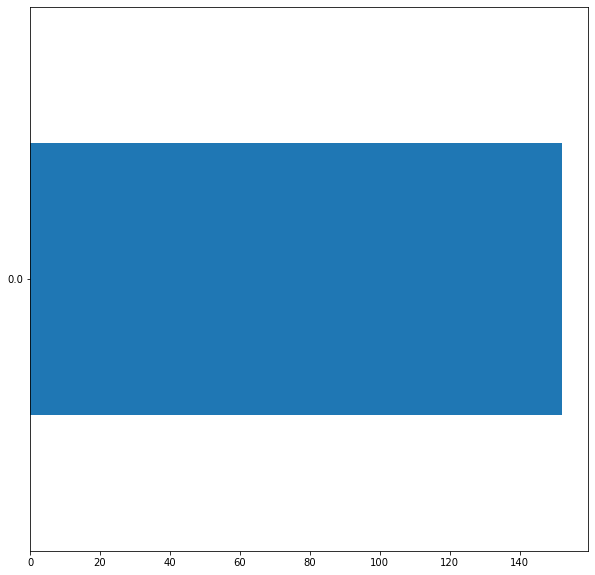

In [11]:
commands = df_p["parMakerNo"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

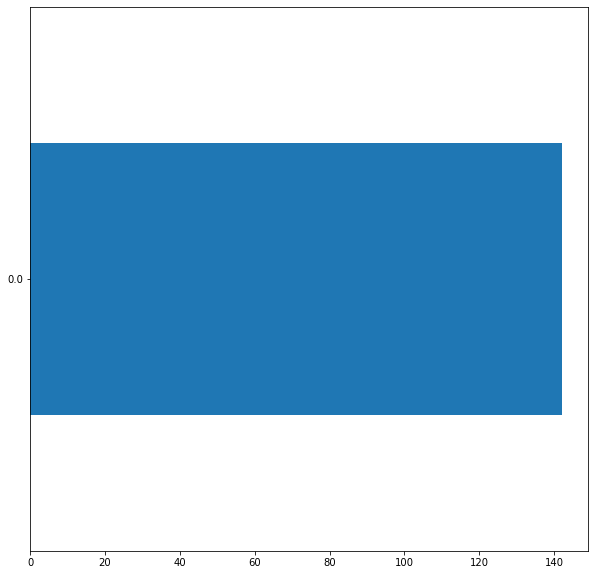

In [12]:
commands = df_p["parSyadaiNo"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

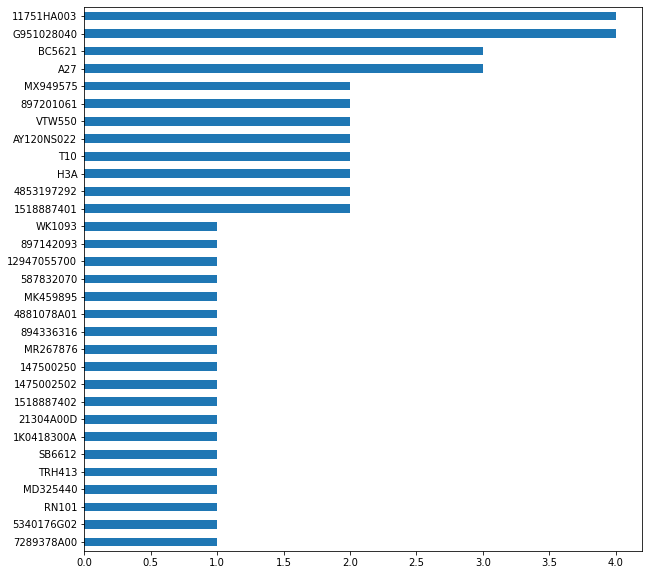

In [13]:
# 空文字列をNaNに置換
df_p["CallHinban"].replace(r'^\s*$', np.nan, regex=True, inplace=True)
# nanを削除
df_p["CallHinban"]= df_p["CallHinban"].dropna(how='any')
df_p["CallHinban"]

commands = df_p["CallHinban"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

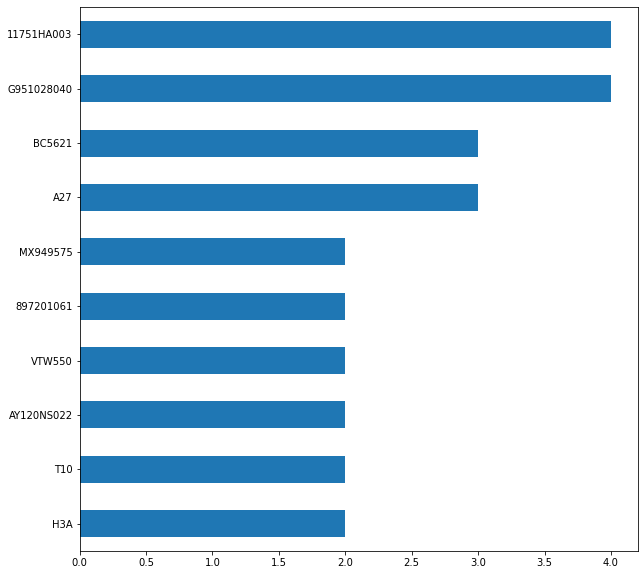

In [14]:
rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:10].plot(kind="barh")
ax.invert_yaxis()

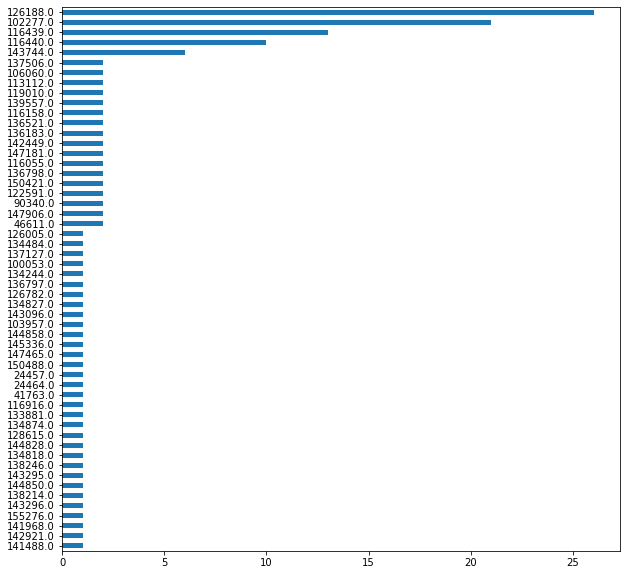

In [15]:
commands = df_p["parKurumaNo"].value_counts(sort=True)

rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

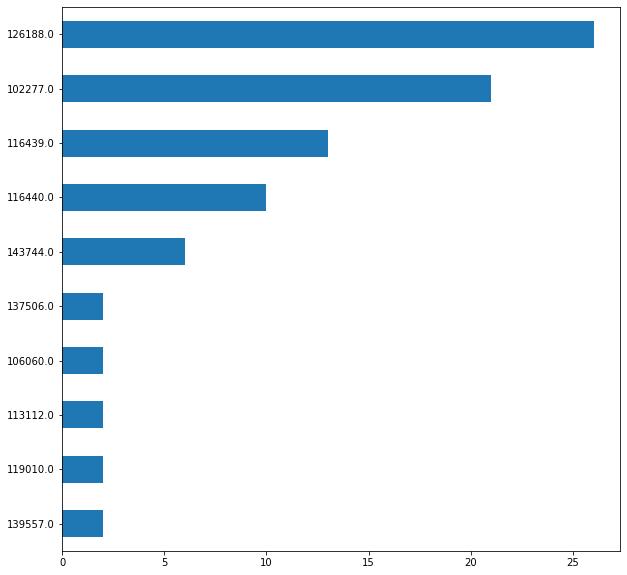

In [16]:
rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:10].plot(kind="barh")
ax.invert_yaxis()

In [18]:
commands = df_p["parKurumaNo"].value_counts(sort=True)
commands.head()

126188.0    26
102277.0    21
116439.0    13
116440.0    10
143744.0     6
Name: parKurumaNo, dtype: int64

In [20]:
commands = df_p["ParamList"].value_counts(sort=True)
commands.head(10)

['', '']                      343
['15096', '0001', '', ' ']     15
['16010', '0014', '', ' ']      5
['16011', '0011', '', ' ']      5
['', '', 'TRH200', ' ']         4
['09190', '0174', '', ' ']      3
['16294', '0036', '', ' ']      3
['', '', 'DBA4GCHVS', ' ']      3
['17714', '007', '', ' ']       3
['16294', '0025', '', ' ']      2
Name: ParamList, dtype: int64

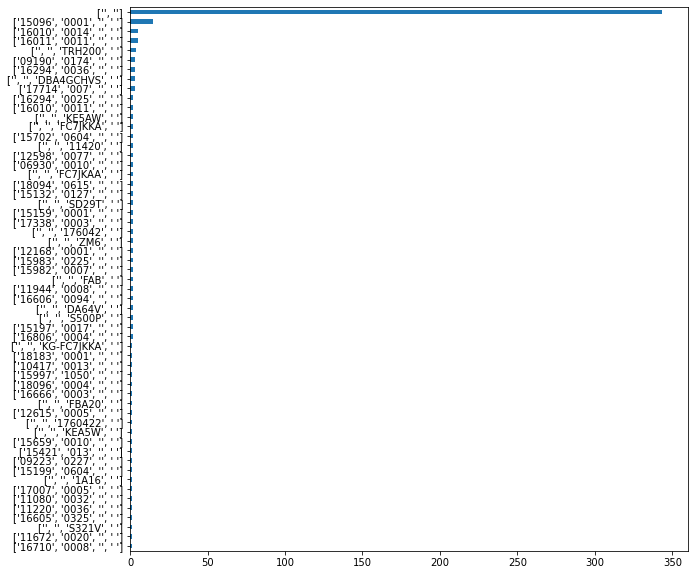

In [21]:
commands = df_p["ParamList"].value_counts(sort=True)
rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

In [45]:
df_p['parHinmokuNos'][0]

"['1020', '1020', '1020', '1021', '1021', '1021', '1023', '1025', '1022', '1022', '1022', '1024', '1026', '1680', '2120', '2121', '2122', '2123', '2125', '2124', '2140', '2141', '2142 ']"

In [48]:
df_p['parHinmokuNos'][0].ASTYPE(LIST)

AttributeError: 'str' object has no attribute 'ASTYPE'

In [ ]:
s 

C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65409 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65408 missing from current

C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 29987 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65423 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65392 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65409 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\edge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65408 missing from current font.
  f

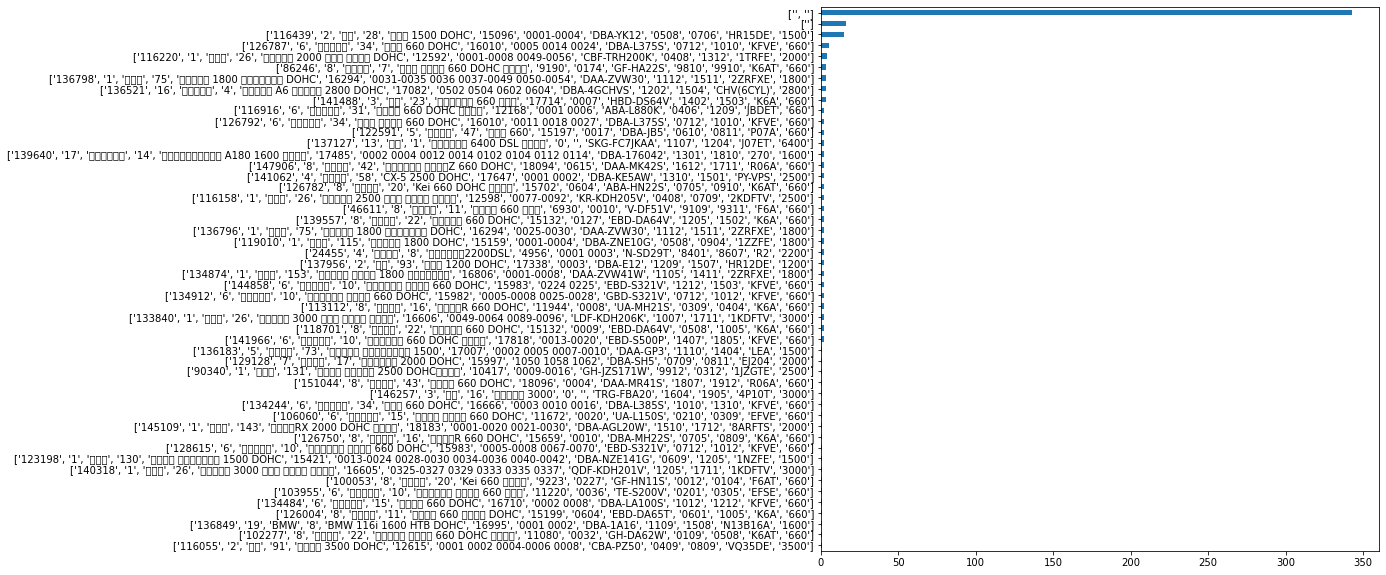

In [24]:
commands = df_p["KurumaInfo"].value_counts(sort=True)
rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()

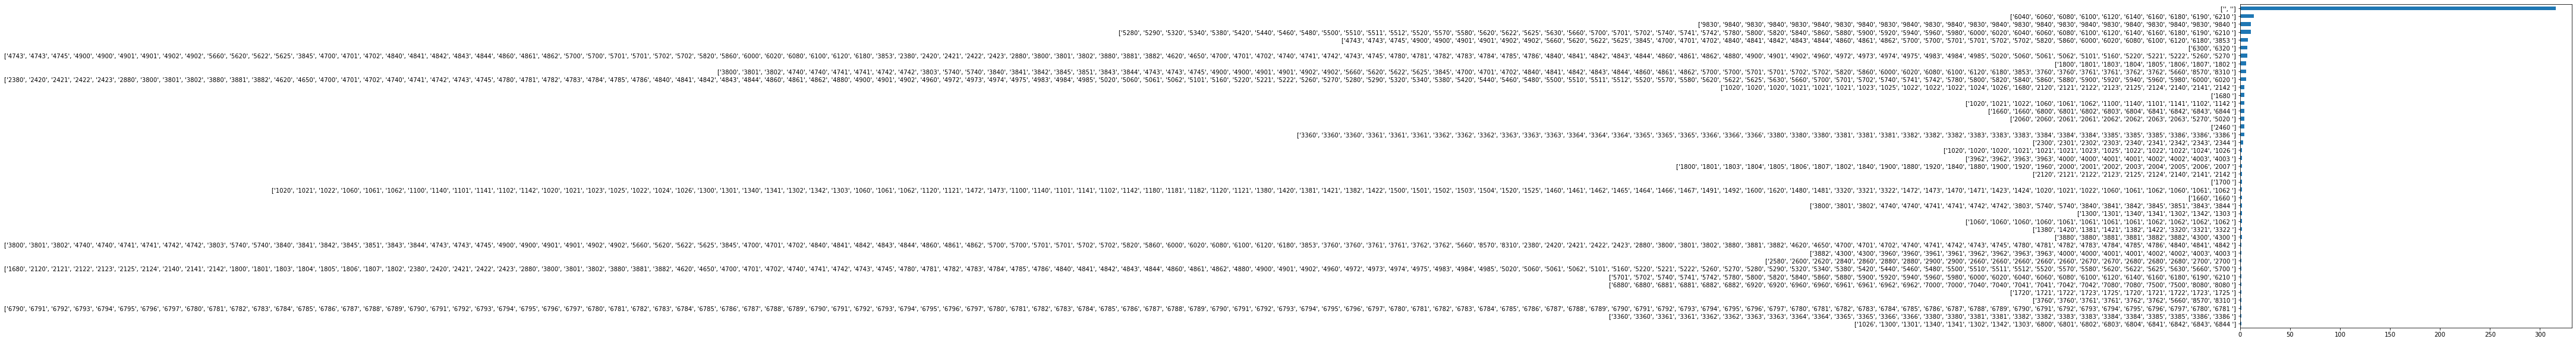

In [25]:
commands = df_p["parHinmokuNos"].value_counts(sort=True)
rcParams['figure.figsize'] = 10, 10
ax = commands.iloc[:].plot(kind="barh")
ax.invert_yaxis()